In [4]:
library(dplyr)
library(cowplot)
# library(lme4)
library(ggplot2)
library(tidyr)
library(tidyr)
library(scales)
library(tidyverse)
library(lubridate)
# install.packages("ggbreak")
library(ggbreak)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.2
✔ purrr     1.1.0     ✔ tibble    3.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ lubridate::stamp()  masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(ggbreak): there is no package called 'ggbreak'


In [5]:
clean_epi <- read.csv('../data/Full_epi_data.csv')[,-1]
head(clean_epi)

,NML.number,Date.of.Collection,Source,Patient,SequenceType,Room_full_cohort,Room_387_cohort,HOSP,Admission.date,PriorAdmission,AdmissionSample,ROOM,MappedValue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,N19-02156,2017-12-06,Environmental,n/a,17,1809B,1809,M,NA,NA,NA,1809,1809
2,N19-02158,2017-12-06,Environmental,n/a,381,1814B,1814,M,NA,NA,NA,1814,1814
3,N19-02159,2017-12-06,Environmental,n/a,155,1815A,1815,M,NA,NA,NA,1815,1815
4,N19-02160,2017-12-06,Environmental,n/a,381,1815B,1815,M,NA,NA,NA,1815,1815
5,N19-02161,2017-12-11,Environmental,n/a,186,D759HHA,,H,NA,NA,NA,759,759
6,N19-02162,2017-12-11,Environmental,n/a,395,D759HHB,,H,NA,NA,NA,759,759


,NML.number,DateCollection,Source,Patient,SequenceType,Room_full_cohort,Room_387_cohort,HOSP,Admission.date,PriorAdmission,AdmissionSample,ROOM,MappedValue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,N19-02156,2017-12-06,Environmental,n/a,17,1809B,1809,M,NA,NA,NA,1809,1809
2,N19-02158,2017-12-06,Environmental,n/a,381,1814B,1814,M,NA,NA,NA,1814,1814
3,N19-02159,2017-12-06,Environmental,n/a,155,1815A,1815,M,NA,NA,NA,1815,1815
4,N19-02160,2017-12-06,Environmental,n/a,381,1815B,1815,M,NA,NA,NA,1815,1815
5,N19-02161,2017-12-11,Environmental,n/a,186,D759HHA,,H,NA,NA,NA,759,759
6,N19-02162,2017-12-11,Environmental,n/a,395,D759HHB,,H,NA,NA,NA,759,759


[1] 2046   13

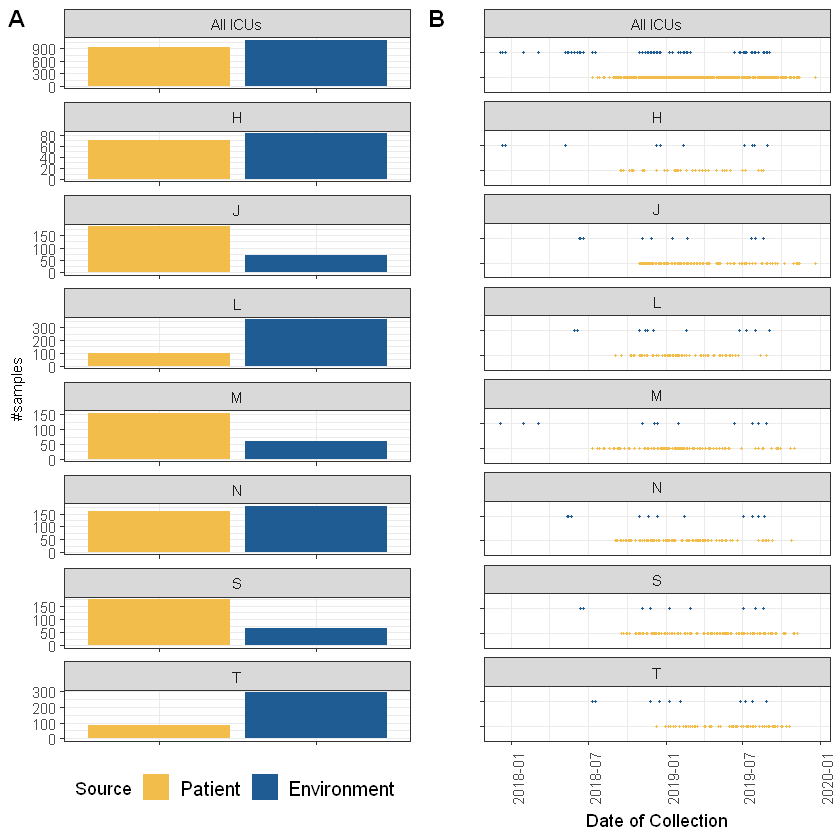

In [6]:
colnames(clean_epi) <- c('NML.number','DateCollection', 'Source','Patient','SequenceType', 
                        'Room_full_cohort','Room_387_cohort','HOSP','Admission.date','PriorAdmission',
                         'AdmissionSample','ROOM','MappedValue')
clean_epi <- clean_epi  %>% filter(NML.number != 'N19-04923')

head(clean_epi)
dim(clean_epi)

df <- clean_epi  %>%select(DateCollection,Source, HOSP)
df2 <- cbind(df, new='All ICUs')  %>% 
select(DateCollection,Source,new) %>% 
rename(HOSP='new')

dfplot <- rbind(df,df2)
write.csv(dfplot, 'df_plot_fig1A.csv')

samples_per_cohort <-  dfplot %>% group_by(Source,HOSP) %>% 
tally() %>% 
ggplot()+
aes(x=Source,y=n, fill=Source)+
geom_bar(stat = 'identity')+
facet_wrap(~ HOSP, ncol=1, scales = 'free')+
ylab('#samples')+
theme_bw()+
scale_fill_manual(values = c('#F3BD4C','#1F5C93'),labels=c('Patient', 'Environment'))+
theme(axis.title.y = element_text(size=9),
      axis.text.y = element_text(size=9),
      legend.text = element_text(size=12),
      legend.position = 'top',
      axis.text.x = element_blank())

dates_per_cohort <- dfplot  %>% 
ggplot()+
aes(x=as.Date(DateCollection),y=Source, color=Source)+
geom_point(size=0.5)+
facet_wrap(~ HOSP, ncol=1)+
xlab('Date of Collection')+ylab('')+
scale_color_manual(values = c('#F3BD4C','#1F5C93'))+
theme(axis.text.x = element_text(angle = 90, size=9))+
theme(legend.position = 'none',
     axis.text.x = element_text(size=10))+theme_bw()

fig1A <- plot_grid(samples_per_cohort+theme(axis.title.x = element_blank(),
                                  legend.position = 'bottom',
                                  legend.direction='horizontal'),
          dates_per_cohort+theme(axis.text.x = element_text(angle = 90),
                                 axis.text.y = element_blank(),
                                 legend.position = 'none'),
          ncol = 2, align = 'hv', axis='b', labels = c('A','B'))
fig1A
ggsave('../output/Figure1A.png', dpi =,device = 'png', width = 5,height = 9)

In [7]:
df_hist_plot <- read.csv('..//data/df_hist_plot.csv')[,-1]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`)."


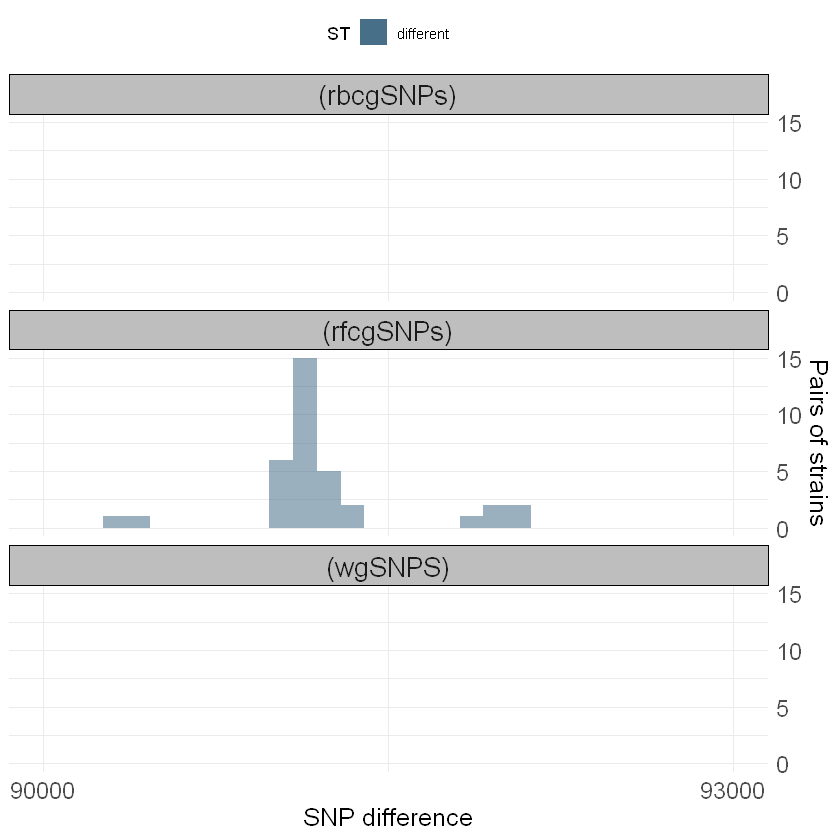

In [8]:
method_names <- c(
                    `Reference free whole genome (ska)` = "(wgSNPS)",
                    `Reference based core genome` = "(rbcgSNPs)",
                    `Reference free core genome` = "(rfcgSNPs)"
                    )

fig1c_2 <- rbind(c(snps = 80000,ST='different', method = 'Reference free whole genome (ska)'),
c(snps = 80000,ST='different', method = 'Reference based core genome'),
df_hist_plot %>% filter(snps > 50000)) %>%
mutate(snps = as.numeric(snps)) %>%
ggplot() +
  aes(x = snps, fill = ST, alpha = 0.6) +
  geom_histogram(position = 'identity') +
  ylab('Pairs of strains') +
  xlab('SNP difference') +
  scale_fill_manual(values = c('#486F88','#B35982')) +
  guides(alpha = 'none') +
  facet_wrap(~method, ncol = 1, labeller = as_labeller(method_names)) +
  scale_x_continuous(limits = c(90000, 93000),breaks = seq(from = 90000, to = 93000, by = 3000)) +
  scale_y_continuous(position = "right")+
  theme_minimal() +
  theme(
    strip.background = element_rect(fill = "grey"),
    strip.text = element_text(size = 16),
    axis.text.y = element_text(size = 14), 
    axis.title.y = element_text(size = 15),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 15),
    legend.position = 'top'
  ) 
fig1c_2

In [9]:
method_names <- c(
                    `Reference free whole genome (ska)` = "Reference free whole genome",
                    `Reference based core genome` = "Reference based core genome",
                    `Reference free core genome` = "Reference free core genome"
                    )

fig1c_1 <- df_hist_plot %>% filter(snps <= 50000)  %>% 
ggplot() +
  aes(x = snps, fill = ST, alpha = 0.6) +
  geom_histogram(position = 'identity') +
  ylab('Pairs of strains') +
  xlab('SNPs differences') +
  scale_fill_manual(values = c('#486F88','#B35982'), na.translate = FALSE, name='Sequence\nType') +
  guides(alpha = 'none') +
  facet_wrap(~method, ncol = 1, scales = "free_y", labeller = as_labeller(method_names)) +
  # scale_x_continuous(limits = c(0, 75000)) +
  # scale_x_break(c(50000, 93000), scales = 0.5) +
  theme_minimal() +
  theme(
    strip.background = element_rect(fill = "white", color=NA),
    strip.text = element_text(size = 16),
    axis.text.y = element_text(size = 12), 
    axis.title.y = element_text(size = 15),
    axis.text.x = element_text(size = 12),
    axis.title.x = element_text(size = 13),
    legend.position = 'top'
  ) 

leg1 <- get_legend(fig1c_1)

Fig1C <- plot_grid(fig1c_1+
          theme(legend.position = 'none'), 
          fig1c_2+
         theme(axis.title.y = element_blank(),
               legend.position = 'none',
                strip.background = element_rect(fill = "white", color=NA),
               strip.text = element_text(size = 16), 
               axis.text.y = element_text(size = 12), 
    axis.text.x = element_text(size = 12),
    axis.title.x = element_text(size = 13)), 
        rel_widths = c(1,0.3))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`)."


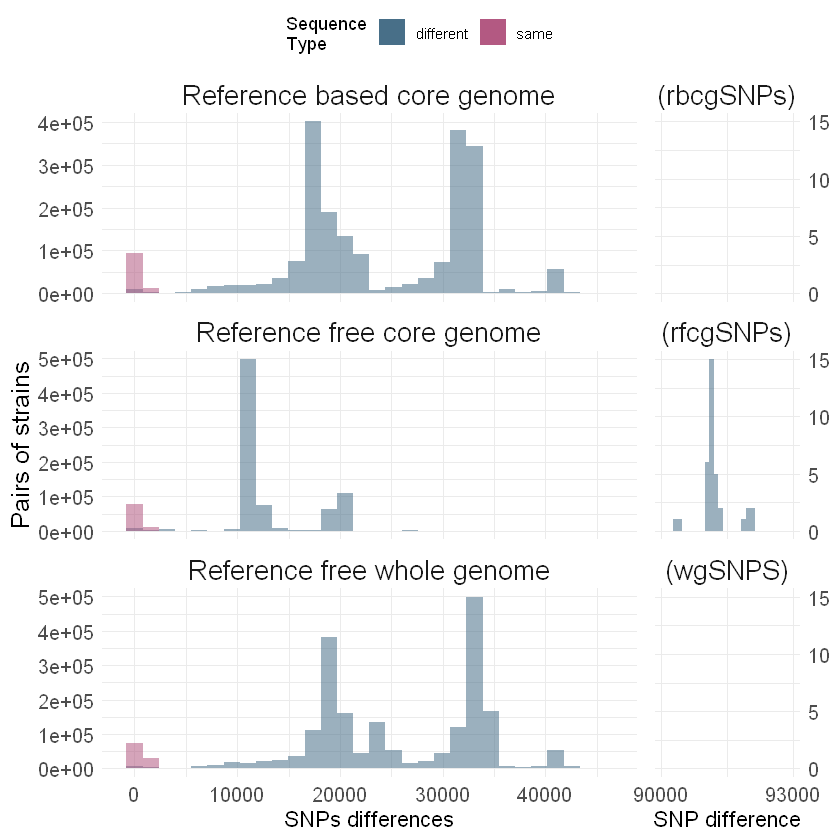

In [10]:
f1c <- plot_grid(leg1, Fig1C, ncol=1,rel_heights=c(0.1,1.2))
f1c
ggsave('../output/Figure1C.png', device = 'png', dpi = 450, width = 7, height = 6)